# Data Cleaning


In [1]:
# Import libraries
import re
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot settings
plt.rcParams['figure.figsize'] = (7, 4)

In [2]:
# Read data
books = pd.read_csv("../data/raw/Books.csv", encoding='latin-1', low_memory=False)
ratings = pd.read_csv("../data/raw/Ratings.csv", encoding='latin-1')
users = pd.read_csv("../data/raw/Users.csv", encoding='latin-1')

In [3]:
# View
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
# Rating dataset View
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
# User dataset view
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
# Shape of the data sets
print("Books:", books.shape)
print("Ratings:", ratings.shape)
print("Users:", users.shape)

Books: (271360, 8)
Ratings: (1149780, 3)
Users: (278858, 3)


In [7]:
# Rename the column names
rename_columns = lambda x: x.rename(columns={col: col.replace('-', '_').lower() for col in x.columns})
users = rename_columns(users)
books = rename_columns(books)
ratings = rename_columns(ratings)

In [8]:
# Check for duplicates
print("Number of duplicates in books dataset:: ", books.duplicated().sum())
print("Number of duplicates in users dataset:: ", users.duplicated().sum())
print("Number of duplicates in ratings dataset:: ", ratings.duplicated().sum())

Number of duplicates in books dataset::  0
Number of duplicates in users dataset::  0
Number of duplicates in ratings dataset::  0


In [9]:
# Number of missing values in books dataset.
books.isnull().sum()

isbn                   0
book_title             0
book_author            2
year_of_publication    0
publisher              2
image_url_s            0
image_url_m            0
image_url_l            3
dtype: int64

In [10]:
# Remove missing values from the data
books.shape

(271360, 8)

### Data Preparation

#### Check & Filter Data with Valid ISBN Number

In [11]:
def is_valid_isbn(isbn_num):
    isbn_num = re.sub(r'[^0-9]', '', isbn_num)
    if len(isbn_num) in [10, 13]:
        return isbn_num
    else:
        return np.nan

In [12]:
books['isbn'] = books['isbn'].apply(is_valid_isbn)
book_df = books.dropna()

In [13]:
# Unique values in categorical variable.
columns = ['isbn', 
           'book_title', 
           'book_author', 
           'year_of_publication', 
           'publisher',
           'image_url_m',
           'image_url_l']

book_df = book_df[columns].copy()
for col in columns:
    print(f"Number of Uniques in {col} = {book_df[col].nunique()}")

Number of Uniques in isbn = 249021
Number of Uniques in book_title = 223881
Number of Uniques in book_author = 96274
Number of Uniques in year_of_publication = 111
Number of Uniques in publisher = 15993
Number of Uniques in image_url_m = 249021
Number of Uniques in image_url_l = 249021


ISBN is a Unique indentifier for books, it must be same as number of book title.

In [14]:
# Check the ISBN for book 'Classical Mythology'
book_df[book_df['book_title'] == "Classical Mythology"]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
95231,0801319536,Classical Mythology,Mark P. O. Morford,1998,John Wiley &amp; Sons,http://images.amazon.com/images/P/0801319536.0...,http://images.amazon.com/images/P/0801319536.0...


- *There are two ISBN Numbers for the 'Classical Mytholoy' book title based on edition.*
- *New edition of a book is considered as a new product, so different editions of each book have a different unique ISBN Number.*
- *Their are various books in dataset that might have a different ISBN Numbers.*
- *In order to recommend readers with most updated and relevant content, let's consider only latest edition of the book.*

In [15]:
# Filter data based on Year of publication and book title
book_df.sort_values(by=['year_of_publication', 'book_title'], ascending=False)

,isbn,book_title,book_author,year_of_publication,publisher,image_url_m,image_url_l
97826,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050,Penguin USA,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...
80264,0140301690,Alice's Adventures in Wonderland and Through t...,Lewis Carroll,2050,Puffin Books,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...
116053,0394701658,Three Plays of Eugene Oneill,Eugene O'Neill,2038,Vintage Books USA,http://images.amazon.com/images/P/0394701658.0...,http://images.amazon.com/images/P/0394701658.0...
37487,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Coville,2030,Aladdin,http://images.amazon.com/images/P/0671746103.0...,http://images.amazon.com/images/P/0671746103.0...
55676,0671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,Bruce Coville,2030,Aladdin,http://images.amazon.com/images/P/0671791990.0...,http://images.amazon.com/images/P/0671791990.0...
...,...,...,...,...,...,...,...
85641,0718142888,10 Lb Penalty,Dick Francis,0,Michael Joseph Ltd,http://images.amazon.com/images/P/0718142888.0...,http://images.amazon.com/images/P/0718142888.0...
81110,3442013453,08/15 Heute,Kirst,0,Wilhelm Goldmann Verlag GmbH,http://images.amazon.com/images/P/3442013453.0...,http://images.amazon.com/images/P/3442013453.0...
51958,2266022253,006781: Bk.1 Gags De Boule Et Bil,ROBA,0,Pocket,http://images.amazon.com/images/P/2266022253.0...,http://images.amazon.com/images/P/2266022253.0...
78643,0941925196,'California Historical Landmarks',California State Parks Office of Historic Pres...,0,California Dept Parks &amp;,http://images.amazon.com/images/P/0941925196.0...,http://images.amazon.com/images/P/0941925196.0...


- *Data is not assigned properly to each columns.*
- *Notice, the year of publication for some books it is 2037, 2038 and 2030. We must consider the books with year of publication until 2024. Let's check in detail each columns.*

In [16]:
# Uniuqe valus in categorical data.
book_df['year_of_publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1995', '1982', '1985',
       '1992', '1986', '1978', '1980', '1983', '1952', '1987', '1981',
       '1990', '1989', '1984', '0', '1968', '1961', '1958', '1974',
       '1976', '1971', '1977', '1975', '1965', '1941', '1970', '1962',
       '1972', '1960', '1979', '1966', '1920', '1973', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1950', '1967',
       '2005', '1957', '1937', '1955', '1954', '1946', '1930', '2011',
       '1925', '1948', '1943', '1947', '1923', '1939', '1926', '1938',
       '2030', '1940', '1911', '1949', '1932', '1928', '1929', '1945',
       '1927', '1936', '1931', '1914', '2050', '1934', '1910', '1933',
       '1902', '1924', '1921', '2038', '2026', '1944', '1917', '1901',
       '2010', '1908', '1906', '1935', '1806', '2021', '2012', '2006',
       '1900', '1909', '1378', '1919', '1922', '1897', '2024'],
      dtype=obje

- *There are some years indicating arbitrary value or may be missing such as 0, or 1378.*
- *Let's consider only books publised upto 2024*

In [17]:
# Filter data
book_df = book_df[book_df['year_of_publication'].str.isnumeric()]

book_df['year_of_publication'] = book_df['year_of_publication'].astype(int)
book_df = book_df[book_df.year_of_publication <= 2024]

In [18]:
book_df.shape

(249011, 7)

### Ratings

In [19]:
# Check for valid ISBN number.
ratings['isbn'] = ratings.isbn.apply(is_valid_isbn)
ratings = ratings.dropna()

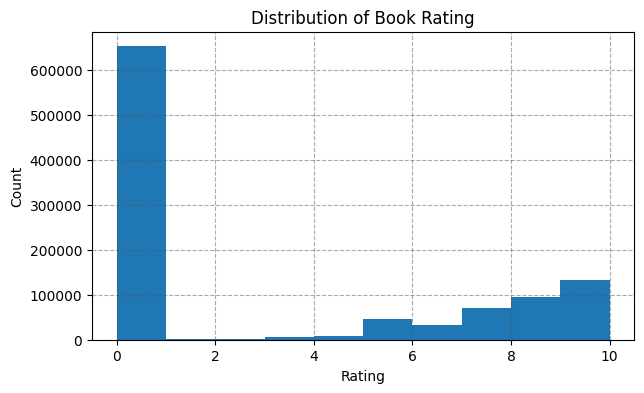

In [20]:
# Examine the distribution of book-ratings
plt.hist(ratings.book_rating)

plt.title("Distribution of Book Rating")
plt.xlabel("Rating")
plt.ylabel("Count")

plt.grid(ls="--", color="#555", alpha=0.5)
plt.show()

- *The highest peak at 0 represent users without rating, it is significantly larger than the actual users who rate the books.*

In [21]:
# Remove users with zero book ratings from rating datasets.
final_ratings = ratings[ratings.book_rating > 0].copy()
final_ratings.shape

(394403, 3)

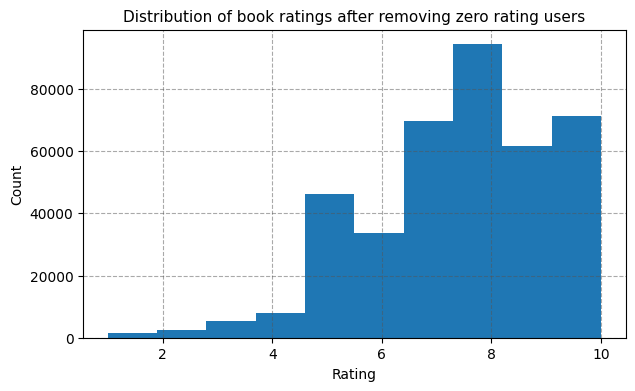

In [22]:
# Distribution of book-ratings after removing zero ratings
plt.hist(final_ratings.book_rating)

plt.title("Distribution of book ratings after removing zero rating users", size=11)
plt.xlabel("Rating")
plt.ylabel("Count")

plt.grid(ls="--", color="#555", alpha=0.5)
plt.show()

- *The distribution is left skewed, meaning the dataset contains large number of books with higher ratings between the 7-9 ratings.*

In [23]:
# Check for missing values
final_ratings.isnull().sum()

user_id        0
isbn           0
book_rating    0
dtype: int64

In [24]:
# Check for duplicates
final_ratings.duplicated().sum()

np.int64(4)

In [25]:
# Drop the duplicates
final_ratings = final_ratings.drop_duplicates()

In [26]:
# Save dataset
final_ratings.to_csv("../data/process_data/ratings_df.csv", index=False)

#### Average Book Ratings

In [27]:
# Calcuate total votes and average ratings
book_ratings = final_ratings.groupby(by=['isbn'])['book_rating'].aggregate(['count','sum', 'mean']).reset_index()
book_ratings.rename(columns={'count': 'n_votes', 'sum':'total_rating', 'mean': 'avg_rating'}, inplace=True)

book_df = book_df.merge(book_ratings, on='isbn')
book_df.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_m,image_url_l,n_votes,total_rating,avg_rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9,69,7.666667
1,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,2,15,7.500000
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,6,47,7.833333
3,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,17,139,8.176471
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,1,8,8.000000


### Standardize Text

#### Book Author Names

In [28]:
# Clean author names
book_df['book_author'] = book_df['book_author'].str.lower()

# Remove all other characters except the alphabets.
book_df['book_author'] = book_df['book_author'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', ' ', x))

# Replace extra spaces
book_df['book_author'] = book_df['book_author'].apply(lambda x: re.sub(r'\s+', ' ', x))
book_df['book_author'] = book_df['book_author'].str.strip()

In [29]:
# Filter out names that likely aren't authors based on keywords, initial patterns, or formatting.
# Non-author indicators might include terms like "Inc", "Ltd", "Collection", "Publishing" etc.
# Define keywords to filter out non-author entries.
non_author_keywords = ["ltd", "inc", "collection", "press", "network", "industry", "academy", "team", "group", 
                       "guides", "publishing", "travel", "society", "association", "library", "magazine", "media",
                       "committee", "corporation", "organization", "international", "foundation", "series", "collection", 
                       "na", "not"]

# Function to determine if a name contains non-author keywords
def is_non_author(name):
    return any(keyword in name.lower().split() for keyword in non_author_keywords)

# Apply filtering
filtered_book_df = book_df[~book_df.book_author.apply(is_non_author)].copy()

In [30]:
print("Before filtering::", book_df.shape)
print("After filtering::", filtered_book_df.shape)

Before filtering:: (137724, 10)
After filtering:: (136935, 10)


In [31]:
print("Number of authors::", filtered_book_df.book_author.nunique())

Number of authors:: 55685


#### Book Titles

In [32]:
# Clean book titles
filtered_book_df['book_title'] = filtered_book_df['book_title'].str.lower()

# Remove all other characters except the alphabets.
filtered_book_df['book_title'] = filtered_book_df['book_title'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

# Replace extra spaces
filtered_book_df['book_title'] = filtered_book_df['book_title'].apply(lambda x: re.sub(r'\s+', ' ', x))
filtered_book_df['book_title'] = filtered_book_df['book_title'].str.strip()

In [33]:
filtered_book_df.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_m,image_url_l,n_votes,total_rating,avg_rating
0,0002005018,clara callan,richard bruce wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9,69,7.666667
1,0060973129,decision in normandy,carlo d este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,2,15,7.500000
2,0374157065,flu the story of the great influenza pandemic ...,gina bari kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,6,47,7.833333
3,0399135782,the kitchen gods wife,amy tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,17,139,8.176471
4,0425176428,what if the worlds foremost military historian...,robert cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,1,8,8.000000


#### Remove Duplicates

In [34]:
# Check duplicates
print("Number of duplicates in Books::", filtered_book_df.duplicated(['book_title', 'book_author']).sum())

Number of duplicates in Books:: 11184


In [35]:
# Let's consider book with maximum votes if duplicate present.
# a = filtered_book_df.groupby(['book_title'])[['n_votes', 'isbn']].max().reset_index()
# final_book_df = filtered_book_df[filtered_book_df.isbn.isin(a.isbn)]

final_book_df = filtered_book_df.drop_duplicates(['book_title'])

In [36]:
filtered_book_df.shape, final_book_df.shape

((136935, 10), (122271, 10))

In [37]:
# Check for missing values
final_book_df.isnull().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
image_url_m            0
image_url_l            0
n_votes                0
total_rating           0
avg_rating             0
dtype: int64

In [38]:
# Check for duplicates in final book data
final_book_df.duplicated().sum()

np.int64(0)

In [39]:
# Save dataset
final_book_df.to_csv("../data/process_data/books_df.csv", index=False)

### User Data

In [40]:
# Save the users data into new dataframe.
user_df = users.copy()

# View
user_df.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [41]:
# Create a new columns for location such as Country & City.
user_df = user_df.assign(country = user_df.location.apply(lambda x: x.split(',')[-1].strip()))
user_df = user_df.assign(city = user_df.location.apply(lambda x: x.split(',')[0].strip()))

# Remove location column
del user_df['location']

In [42]:
# Function
def clean_text(text):
    # Apply lowercasing
    text = text.lower()
    # Remove all other characters except the alphabets.
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # Replace extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

user_df['country'] = user_df['country'].apply(clean_text)

In [43]:
# Renaming the country names
country_names = {
    'afganstand holla ':'afghanistan',
    'ahrensburg': 'germany',
    'alachua': 'united states of america',
    'alg rie': 'algeria',
    'allen': 'ireland',
    'america': 'united states of america',
    'american samoa': 'united states of america',
    'antigua  barbuda': 'antigua and barbuda',
    'austbritania': 'australia',
    'australii': 'australia',
    'autralia': 'australia',
    'bademn w rtemberg': 'germany',
    'baden w rttemberg': 'germany',
    'belgi': 'belgium',
    'belgique': 'belgium',
    'bell': 'belize',
    ' brasil':'brazil',
    'brasil': 'brazil',
    'brunei darussalam': 'brunei',
    'burkina faso': 'burkinafasu',
    'can': 'canada',
    'canada eh': 'canada',
    'cananda': 'canada',
    'canda': 'canada',
    'camden': 'canada',
    'catalonia': 'spain',
    'catalunya': 'spain',
    'catalunya catalonia': 'spain',
    'catalunya spain': 'spain',
    'chadwick ct': 'chad',
    'cherokee':'chad',
    'chian': 'china',
    'china people s republic': 'china',
    'cn': 'china',
    'cnina': 'china',
    'collin': 'colombia',
    'commonwealth of northern mariana islands': 'united states of america',
    'cook': 'new zealand',
    'copenhagen': 'denmark',
    'courtenay': 'croatia',
    'csa': 'united states of america',
    'cted': 'chad',
    'czech republic': 'germany',
    'de': 'germany',
    'der': 'germany',
    'deutsches reich': 'germany',
    'deutschland': 'germany',
    'dfg': 'germany',
    'distrito federal' : 'brazil',
    'dominican republic': 'dominica',
    'dublin' : 'ireland',
    'east africa': 'africa',
    'ee uu' :'united states of america',
    'effingham':'united states of america',
    'el salvador' : 'el salvador',
    'england': 'united kingdom',
    'englanduk': 'united kingdom',
    'english': 'united kingdom',
    'equatorial geuinea' : 'equatorial geuinea',
    'espa a':'spain',
    'essex':'united kingdom',
    'euskadi':'spain',
    'euskal herria': 'basque',
    'ferrara': 'italy',
    'fifi': 'fiji',
    'fontana': 'brazil',
    'fortaleza': 'brazil',
    'fort bend': 'brazil',
    'frome' : 'rome',
    'galiza': 'spain',
    'galiza neghra': 'spain',
    'gb': 'united kingdom',
    'geermany': 'germany',
    'germay': 'germany',
    'good old u s a': 'united states of america',
    'good old usa': 'united states of america',
    'goteborg': 'sweden',
    'greece hellas' :'greece',
    'guam': 'united states of america',
    'guinea bissau': 'guinea',
    'hamilton': 'canada',
    'hampden': 'united states of america',
    'hennipen': 'united states of america',
    'henry': 'hungary',
    'hongkong': 'china',
    'houston':'united states of america',
    'h u g': 'hungary',
    'hungary and usa' : 'hungary',
    'id' : 'iceland',
    'il canada': 'canada',
    'in': 'india',
    'indiai': 'india',
    'isle of man': 'isle of man',
    'isreal': 'israel',
    'italia': 'italy',
    'italien' : 'italy',
    'itlay': 'italy',
    'kern': 'kenya',
    'korea': 'south korea',
    'ksa': 'united states of america',
    'kz': 'kyrgyzstan',
    'l alg rie': 'algeria',
    'l italia': 'italy',
    'la argentina': 'argentina',
    'la belgique': 'belgium',
    'la chine eternelle' : 'china',
    'la chine ternelle': 'china',
    'la france': 'france',
    'la suisse': 'switzerland',
    'la svizzera': 'switzerland',
    'le canada': 'canada',
    'le madagascar': 'madagascar',
    'lecce': 'italy',
    'lee': 'italy',
    'liaoning': 'china',
    'lleida': 'spain',
    'lombardia': 'italy',
    'los estados unidos de norte america': 'united states of america',
    'm rida': 'mexico',
    'm xico': 'mexico',
    'macau': 'china',
    'madrid': 'spain',
    'maine': 'united states of america',
    'malaysian': 'malaysia',
    'maracopa': 'maricopa',
    'maroc': 'morocco',
    'marrion': 'morocco',
    'marshall islands': 'marshall islands',
    'milano': 'italy',
    'minnehaha': 'italy',
    'mo ambique': 'mozambique',
    'monroe':'united states of america',
    'monterrey': 'mexico',
    'my':'myanmar',
    'nederlands': 'netherlands',
    'netherlands antilles': 'netherlands',
    'never land': 'netherlands',
    'new london': 'united kingdom',
    'north carolina': 'united states of america',
    'northern ireland': 'united kingdom',
    'nrw': 'norway',
    'nyc': 'united states of america',
    'nz': 'new zealand',
    'ohio': 'united states of america',
    'onondaga nation': 'united states of america',
    'orange co': 'united states of america',
    'orense': 'spain',
    'osceola': 'united states of america',
    'palmbeach': 'united states of america',
    'pasco' :'united states of america',
    'pender' :'united states of america',
    'people s republic of china': 'china',
    'per': 'peru',
    'phila' : 'philippines',
    'philippine':'philippines',
    'philippinies' : 'philippines',
    'phillipines': 'philippines',
    'phils' :'philippines',
    'phippines':'philippines',
    'pinallas':'philippines',
    'pippo':'philippines',
    'p r c': 'china',
    'p r china': 'china',
    'prc': 'china',
    'pr': 'china',
    'republic of korea': 'south korea',
    'republic of panama': 'panama',
    'roma': 'italy',
    'rsa': 'russia',
    'russian federation': 'russia',
    's africa': 'south africa',
    's corea': 'south korea',
    'saint kitts and nevis': 'saint kitts and nevis',
    'saint loius': 'united states of america',
    'san bernardino': 'united states of america',
    'san franicsco': 'united states of america',
    'san mateo': 'united states of america',
    'santa barbara': 'united states of america',
    'sao tome and principe': 'sao tome and principe',
    'sardegna': 'italy',
    'sardinia': 'italy',
    'saudia arabia': 'saudi arabia',
    'scotland': 'united kingdom',
    'serbia and montenegro': 'serbia',
    'serbia montenegro': 'serbia',
    'singapore united kingdom': 'singapore',
    'slo': 'slovakia',
    'slovak republik': 'slovakia',
    'srilanka': 'sri lanka',
    'sri lanka n a': 'sri lanka',
    'suisse': 'switzerland',
    'sultanate of oman': 'oman',
    'swaziland': 'switzerland',
    'swazilandia': 'switzerland',
    'tdzimi': 'tanzania',
    'texas': 'united states of america',
    'thailoand': 'thailand',
    'the gambia': 'gambia',
    'the netherlands': 'netherlands',
    'the philippines': 'philippines',
    'toscana': 'italy',
    'trinidad' : 'trinidad and tobago',
    'trinidad tobago': 'trinidad and tobago',
    't rkiye': 'turkey',
    'turkei': 'turkey',
    'tyrtyrt': 'turkey',
    'u a e': 'united arab emirates',
    'u k': 'united kingdom',
    'u s': 'united states of america',
    'u s a': 'united states of america',
    'u s of a': 'united states of america',
    'u s virgin islands': 'united states of america',
    'ua': 'united states of america',
    'uae': 'united arab emirates',
    'uk': 'united kingdom',
    'ukrain': 'ukraine',
    'united kindgdom': 'united kingdom',
    'united kindgonm': 'united kingdom',
    'united staes': 'united states of america',
    'united state': 'united states of america',
    'united statea': 'united states of america',
    'united stated' : 'united states of america',
    'united states' : 'united states of america',
    'united stated of america': 'united states of america',
    'unite states': 'united states of america',
    'urugua': 'uruguay',
    'us' : 'united states of america',
    'usa': 'united states of america',
    'usa canada': 'united states of america',
    'usa currently living in england': 'united states of america',
    'ussurfing': 'united states of america',
    'ust': 'united states of america',
    'uusa': 'united states of america',
    'van wert': 'vanuatu',
    'ventura': 'venezuela',
    'ventura county': 'venezuela',
    'vicenza': 'australia',
    'victoria': 'australia',
    'wales': 'united kingdom',
    'w malaysia': 'malaysia',
    'wonderful usa': 'united states of america',
    'ysa': 'united states of america',
    'zhengjiang': 'china',
}

# Apply and save the changes.
user_df['country'] = user_df.country.replace(country_names)

In [44]:
# Correct country names
country_list = ['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'brunei', 'bulgaria', 'burkina faso', 'burundi', "côte d'ivoire", 'cabo verde', 'cambodia', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'costa rica', 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'equatorial guinea', 'eritrea', 'estonia', 'eswatini (fmr. "swaziland")', 'ethiopia', 'fiji', 'finland', 'france', 'gabon', 'gambia', 'georgia', 'germany', 'ghana', 'greece', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'iceland', 'india', 'indonesia', 'iran', 'iraq', 'ireland', 'israel', 'italy', 'jamaica', 'japan', 'jordan', 'kazakhstan', 'kenya', 'kiribati', 'kuwait', 'kyrgyzstan', 'laos', 'latvia', 'lebanon', 'lesotho', 'liberia', 'libya', 'liechtenstein', 'lithuania', 'luxembourg', 'madagascar', 'malawi', 'malaysia', 'maldives', 'mali', 'malta', 'marshall islands', 'mauritania', 'mauritius', 'mexico', 'micronesia', 'moldova', 'monaco', 'mongolia', 'montenegro', 'morocco', 'mozambique', 'myanmar', 'namibia', 'nauru', 'nepal', 'netherlands', 'new zealand', 'nicaragua', 'niger', 'nigeria', 'north korea', 'north macedonia', 'norway', 'oman', 'pakistan', 'palau', 'palestine state', 'panama', 'papua new guinea', 'paraguay', 'peru', 'philippines', 'poland', 'portugal', 'qatar', 'romania', 'russia', 'rwanda', 'saint kitts and nevis', 'saint lucia', 'saint vincent and the grenadines', 'samoa', 'san marino', 'sao tome and principe', 'saudi arabia', 'senegal', 'serbia', 'seychelles', 'sierra leone', 'singapore', 'slovakia', 'slovenia', 'solomon islands', 'somalia', 'south africa', 'south korea', 'south sudan', 'spain', 'sri lanka', 'sudan', 'suriname', 'sweden', 'switzerland', 'syria', 'tajikistan', 'tanzania', 'thailand', 'timor-leste', 'togo', 'tonga', 'trinidad and tobago', 'tunisia', 'turkey', 'turkmenistan', 'tuvalu', 'uganda', 'ukraine', 'united arab emirates', 'united kingdom', 'united states of america', 'uruguay', 'uzbekistan', 'vanuatu', 'venezuela', 'vietnam', 'yemen', 'zambia', 'zimbabwe']

# Filter user data
user_df = user_df[user_df.country.isin(country_list)]

# Number of users
users.shape, user_df.shape

((278858, 3), (273264, 4))

In [45]:
# Users summary statistics
user_df.describe().round()

,user_id,age
count,273264.0,165613.0
mean,139444.0,35.0
std,80492.0,14.0
min,1.0,0.0
25%,69722.0,24.0
50%,139454.0,32.0
75%,209149.0,44.0
max,278858.0,244.0


In [46]:
user_df.describe(include='object')

,country,city
count,273264,273264
unique,174,32220
top,united states of america,london
freq,139786,4060


- *The minimum age is 0, while maximum value for the Age column is 244.*

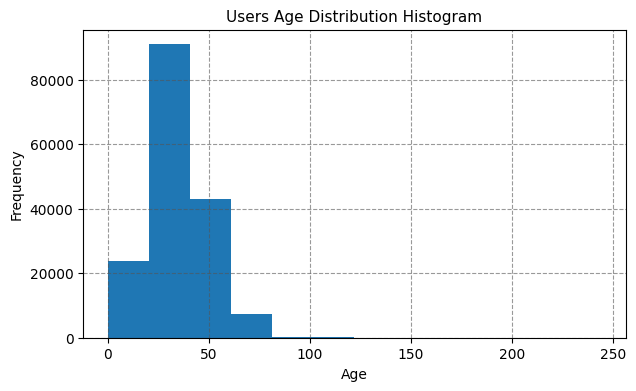

In [47]:
# Visual representation of distribution of user's age.
user_df.age.plot(kind='hist', bins=12)

# Add labels
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Users Age Distribution Histogram", size=11)

plt.grid(ls='--', color='#555', alpha=0.6);

In [48]:
# Users with age greater than 100.
print("Number of Users with Age > 100: ", user_df[user_df.age > 100].shape[0])

Number of Users with Age > 100:  355


#### Handling Outliers

In [49]:
# To handle Outliers
# Use Interquantile range method to handle outliers in the 'Age' Column
Q1 = users.age.quantile(0.25)
Q3 = users.age.quantile(0.75)

IQR = Q3 - Q1

upper_range = IQR*1.5 + Q3
lower_range = IQR*1.5 - Q1

user_df['age'] = user_df.age.map(lambda x: lower_range if x < lower_range else x)
user_df['age'] = user_df.age.map(lambda x: upper_range if x > upper_range else x)

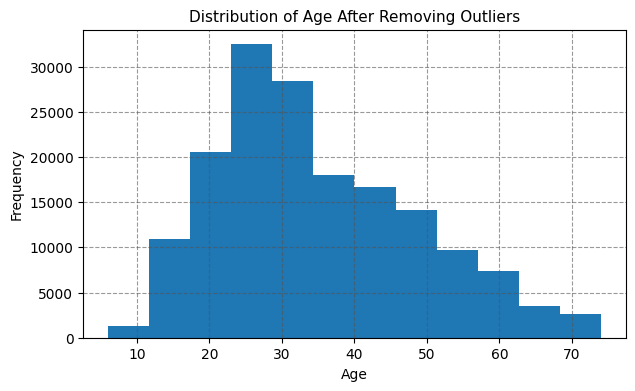

In [50]:
# Examine the distribution of Age
user_df.age.plot(kind='hist', bins=12)

# Add labels
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age After Removing Outliers", size=11)

plt.grid(ls='--', color='#555', alpha=0.6);

#### Handling Missing Data

In [51]:
# Check for missing values in users.
user_df.isnull().sum() * 100 / len(users)

user_id     0.000000
age        38.604236
country     0.000000
city        0.000000
dtype: float64

- *Almost 40% of data in AGE column is missing.*

In [52]:
# Create a missing flag feature for age column
user_df['is_age_missing'] = user_df.age.isnull().astype('int')

In [53]:
# Combine user data with ratings to fill missing values
user_ratings = user_df.merge(final_ratings, on='user_id')

In [54]:
# find the average age of reader by particular book.
# Consider original age data.
age_by_book = user_ratings.query('is_age_missing==0').groupby(by='isbn', 
                                                             observed=True)['age'].median().astype(int)
age_by_book_dict = age_by_book.to_dict()

# Convert it into dataframe
age_df = pd.DataFrame.from_dict(age_by_book_dict, 
                                orient='index', 
                                columns=['avg_age']).reset_index()
age_df.rename({'index': 'isbn'}, axis=1, inplace=True)

In [55]:
# Merge datasets & replace missing values in age by average age.
merged_df = user_ratings.merge(age_df, on='isbn', how='left')
merged_df['age'] = merged_df['age'].fillna(merged_df['avg_age'])

# Remove the avg_age column
del merged_df['avg_age']

# View
merged_df.head()

,user_id,age,country,city,is_age_missing,isbn,book_rating
0,8,30.0,canada,timmins,1,0002005018,5
1,8,NaN,canada,timmins,1,0887841740,5
2,8,NaN,canada,timmins,1,1552041778,5
3,8,NaN,canada,timmins,1,1567407781,6
4,8,NaN,canada,timmins,1,1575663937,6


- *After joining the datasets, we can see that user_id 8 has age for one 'isbn' only.*
- *There is possibility that one user_id can have multiple age values, since we filled missing values by book.*
-  *By using this information, we can filled missing values of age by user_id for only data that was missing originally.*

In [56]:
# filtered data with missing age values. 
a = merged_df.query('is_age_missing==1').dropna()

# Compute the average age by user_id
age_by_user = a.groupby(by='user_id', observed=True)['age'].median().astype(int)
age_by_user_dict = age_by_user.to_dict()

# Convert it into dataframe
age__df = pd.DataFrame.from_dict(age_by_user_dict, 
                                orient='index', 
                                columns=['avg_user_age']).reset_index()
age__df.rename({'index': 'user_id'}, axis=1, inplace=True)

In [57]:
# Filled missing values by average age by user.
final_user_df = merged_df.merge(age__df, on='user_id', how='left')
final_user_df['age'] = final_user_df['age'].fillna(final_user_df['avg_user_age'])

# Remove age_user_age column
del final_user_df['avg_user_age']

# View
final_user_df.head()

,user_id,age,country,city,is_age_missing,isbn,book_rating
0,8,30.0,canada,timmins,1,0002005018,5
1,8,30.0,canada,timmins,1,0887841740,5
2,8,30.0,canada,timmins,1,1552041778,5
3,8,30.0,canada,timmins,1,1567407781,6
4,8,30.0,canada,timmins,1,1575663937,6


In [58]:
# Create a new column 'age_grp'
labels = ['Childern', 'Teens', 'Young Adults', 'Adults', 'Seniors']
bins = [4, 12, 18, 35, 60, 100]
final_user_df['age_grp'] = pd.cut(final_user_df.age, bins=bins, labels=labels)

# View
final_user_df.head()

,user_id,age,country,city,is_age_missing,isbn,book_rating,age_grp
0,8,30.0,canada,timmins,1,0002005018,5,Young Adults
1,8,30.0,canada,timmins,1,0887841740,5,Young Adults
2,8,30.0,canada,timmins,1,1552041778,5,Young Adults
3,8,30.0,canada,timmins,1,1567407781,6,Young Adults
4,8,30.0,canada,timmins,1,1575663937,6,Young Adults


In [59]:
# Shape
user_df.shape, final_user_df.shape

((273264, 5), (375080, 8))

In [60]:
# Check for duplicates drop if any.
if final_user_df.duplicated().sum():
    final_user_df = final_user_df.drop_duplicated(inplace=True)

In [61]:
# Save datasets
final_user_df.to_csv("../data/process_data/users_df.csv", index=False)

- *Datasets are clean and saved for further analysis*